### Question 1. Hubble Space Telescope Proposal

The proposal requested 36 orbits of the Hubble Space Telescope (HST) in 3 gyro mode control, or 40 orbits in 2 gyro mode control, to obtain deep imaging of two Local Group dwarf elliptical (dE) galaxies NGC 147 and NGC 185. The instrument requested is the Advanced Camera for Surveys and the F606W/F814W filters (WFC V- and I-band imaging). Observation time is split equally in both modes between the two dE galaxies.

In terms of science, ACS data would allow for measurement of star formation histories in NGC 147 and NGC 185 by generating the color magnitude diagram with the main sequence turnoff for the two galaxies' populations. Determining the main sequence turnoff can then let astronomers decide between two formation scenarios of the origin of dE galaxies (i.e. as ancient, primordial objects or recently evolved from progenitor galaxies). Notably, NGC 147 and NGC 185 are the only two accessible dE galaxies for imaging from HST at and below the main sequence turnoff.

### Question 2. Making Color Images with HST data

2b. From the "Value" and "Image" data when selecting pixels, the image size is 2850x2850 pixels overall; the minimum pixel value is 0 (black) and the maximum observed is around 0.06 (still quite dim). 


In [1]:
# import headers
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import img_scale

In [2]:
# 2c. Opening the image file in python

hdulist = fits.open('hst_05969_01_wfpc2_f555w_wf_drz.fits')
hdulist.info()

header = hdulist[0].header
data = hdulist[0].data

print("\nhdulist[1].data is:", hdulist[1].data)

Filename: hst_05969_01_wfpc2_f555w_wf_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1910   ()      
  1  SCI           1 ImageHDU       103   (2850, 2850)   float32   
  2  WHT           1 ImageHDU       124   (2850, 2850)   float32   
  3  CTX           1 ImageHDU       124   (2850, 2850, 2)   int32   

hdulist[1].data is: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
header   # print header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2009-11-05'         / date this file was written (yyyy-mm-dd)        
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFPC2 '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                                                                                
              / WFPC-II DATA DESCRIPTOR KEYWORDS                                
                            

From the header information:


RA_TARG =   2.592804166667E+02 / right ascension of the target (deg) (J2000)    
DEC_TARG=   4.313638888889E+01 / declination of the target (deg) (J2000)     

The target right ascension is 259.2804 deg and declination 43.1363 deg (in J2000). 
The target name is **NGC 6341** (Messier 92) and instrument used is WFPC2. 


In [4]:
# 2d. Basic image statistics

data = hdulist[1].data
print("The size of the image is", data.shape, "pixels.")   # use hdulist[1] as data

min_pixel = 1
for vector in data:
    for pixel in vector:
        if pixel <= min_pixel:
            min_pixel = pixel
print("The minimum pixel value is", min_pixel)

max_pixel = -1
for vector2 in data:
    for pixel2 in vector2:
        if pixel2 >= max_pixel:     # coding bug
            max_pixel = pixel2
print("The maximum pixel value is", max_pixel)

# talies with numpy function:
np.min(hdulist[1].data), np.max(hdulist[1].data)

The size of the image is (2850, 2850) pixels.
The minimum pixel value is -1458.7344
The maximum pixel value is 89778.88


(-1458.7344, 89778.88)

In [5]:
# Bound the data to 1 to 99th percentile
print("Note that the 1st and 99th percentiles are:", \
      "{:.5f}".format(np.percentile(hdulist[1].data, 1)), "and", \
      "{:.5f}".format(np.percentile(hdulist[1].data, 99)), "respectively.")
print("\nThe mean is", np.mean(hdulist[1].data))
print("The median is", np.median(hdulist[1].data))

print("\nWhile there are some extreme outliers in the data, from the 1st to 99th\
percentile, the maximum and minimum are comparable to the DS9 max and min of \
0.6 and 0.")


Note that the 1st and 99th percentiles are: -0.16954 and 14.08963 respectively.

The mean is 0.7805436
The median is 0.0

While there are some extreme outliers in the data, from the 1st to 99thpercentile, the maximum and minimum are comparable to the DS9 max and min of 0.6 and 0.


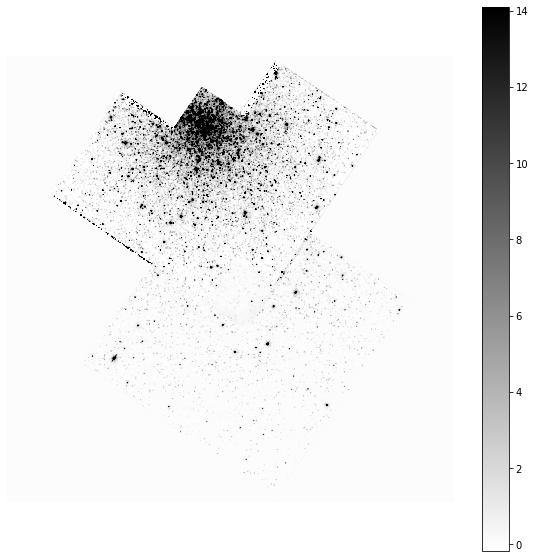

In [6]:
# 2e. Display image in python with different settings

fig = plt.figure(figsize = (10, 10))
plt.imshow(data, origin = 'lower', cmap = 'gray_r', \
           vmin = np.percentile(data, 1), \
           vmax = np.percentile(data, 99))
plt.axis('off')
plt.colorbar()

In [7]:
# 2f. Combine three images
# number of pixels for main image: 2850 x 2850

def combine_images(picture1, picture2, picture3, red_max, green_max, blue_max, \
                   picture_title, file_name, image_size_x, image_size_y):
    
    img = np.zeros((image_size_x, image_size_y, 3), dtype=float)
    img[:,:,0] = img_scale.asinh(picture1, scale_min=0.0, scale_max=red_max)
    img[:,:,1] = img_scale.asinh(picture2, scale_min=0.0, scale_max=green_max)
    img[:,:,2] = img_scale.asinh(picture3, scale_min=0.0, scale_max=blue_max)
    
    fig = plt.figure(figsize = (10, 10))
    py.clf()
    py.imshow(img, aspect='equal')
    py.title(str(picture_title))
    py.savefig(file_name)
    print("Image generated.")
    return img

# 6,6,0.2 good combination
    

Percentiles for f814w: 0.0 0.0
Percentiles for f555w: 0.0 0.4552275627851493
Percentiles for f336w: 0.0 0.0
img_scale : asinh
img_scale : asinh
img_scale : asinh
Image generated.


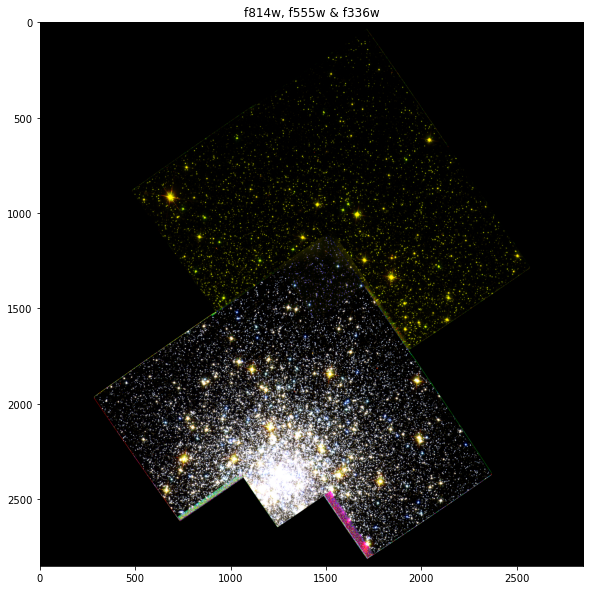

In [8]:
hdulist = fits.open('hst_05969_01_wfpc2_f555w_wf_drz.fits')
f814w_img = fits.open('hst_05969_01_wfpc2_f814w_wf_drz.fits')
f555w_img = fits.open('hst_05969_01_wfpc2_f555w_wf_drz.fits')
f336w_img = fits.open('hst_05969_01_wfpc2_f336w_wf_drz.fits')
f255w_img = fits.open('hst_05969_01_wfpc2_f255w_wf_drz.fits')

f814w_img_data = f814w_img[1].data
f555w_img_data = f555w_img[1].data
f336w_img_data = f336w_img[1].data
f255w_img_data = f255w_img[1].data

print("Percentiles for f814w:", np.percentile(f814w_img_data, 20),\
      np.percentile(f814w_img_data, 50))
print("Percentiles for f555w:", np.percentile(f555w_img_data, 20),\
      np.percentile(f555w_img_data, 90))
print("Percentiles for f336w:", np.percentile(f555w_img_data, 20),\
      np.percentile(f555w_img_data, 50))

img1 = combine_images(f814w_img_data,f555w_img_data, f336w_img_data,6,6,0.2,\
                     "f814w, f555w & f336w","RGB_image1_Yujun.jpg", 2850,2850)


Image loaded for NGC 6432, from Hubble archives.
Image size is (1300, 1300)
Percentiles for f814w: -0.005513249803334474 0.01750091575086119
Percentiles for f606w: 0.0 0.0076892502605915075
Percentiles for f300w: 0.0 0.0016501014004461467
img_scale : asinh
img_scale : asinh
img_scale : asinh
Image generated.


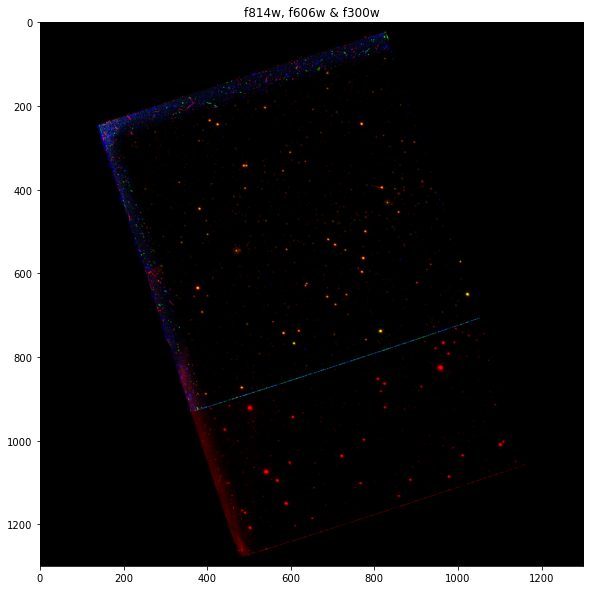

In [9]:
# Bonus

try:
    ngc6432_f814w = fits.open('hst_07909_l4_wfpc2_f814w_pc_sci.fits')
    ngc6432_f606w = fits.open('hst_07909_l4_wfpc2_f606w_pc_sci.fits')
    ngc6432_f300w = fits.open('hst_07909_l4_wfpc2_f300w_pc_sci.fits')
    
    f814w_img_data = ngc6432_f814w[1].data
    f606w_img_data = ngc6432_f606w[1].data
    f300w_img_data = ngc6432_f300w[1].data
    
    print("Image loaded for NGC 6432, from Hubble archives.")
    print("Image size is", f300w_img_data.shape)
    print("Percentiles for f814w:", np.percentile(f814w_img_data, 20),np.percentile(f814w_img_data, 90))
    print("Percentiles for f606w:", np.percentile(f606w_img_data, 20),np.percentile(f606w_img_data, 90))
    print("Percentiles for f300w:", np.percentile(f300w_img_data, 20),np.percentile(f300w_img_data, 90))

    img2 = combine_images(f814w_img_data,f606w_img_data, f300w_img_data,5,5,0.6,\
                     "f814w, f606w & f300w","bonus_image_Yujun.jpg",1300,1300)

except:
    print("Bonus image not detected.") # to not crash program